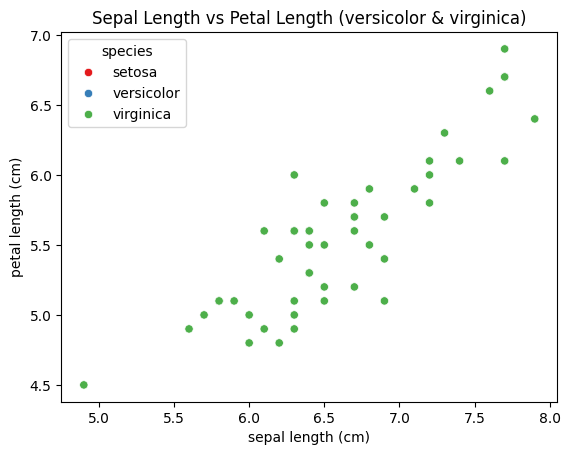

In [22]:
#[Problem 1] Select features and categories for practice
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris=load_iris();
df=pd.DataFrame(iris.data,columns=iris.feature_names)

df['species']=pd.Categorical.from_codes(iris.target,iris.target_names)
df_filtred=df[df['species'].isin(['virgicolor','virginica'])]
#df_selected=df_filtred[['sepal length (cm)','petal length (cm)','	species']]
df_selected = df_filtred[['sepal length (cm)', 'petal length (cm)', 'species']]

df_selected

sns.scatterplot(data=df_selected,x='sepal length (cm)',y='petal length (cm)',hue='species',palette='Set1')
plt.title('Sepal Length vs Petal Length (versicolor & virginica)')
plt.show()

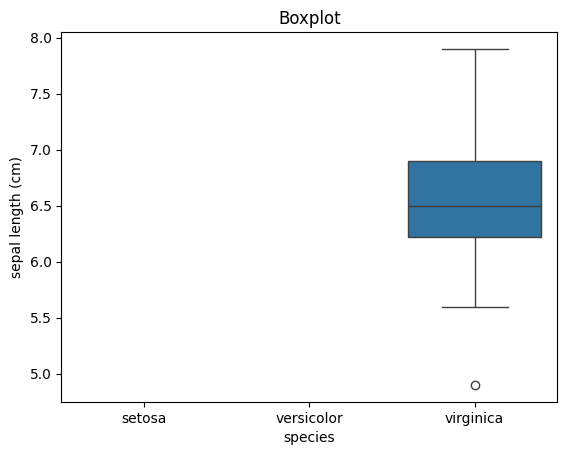

In [23]:
#[Problem 2] Data analysis
sns.boxplot(data=df_selected,x='species',y='sepal length (cm)')
plt.title('Boxplot')
plt.show()

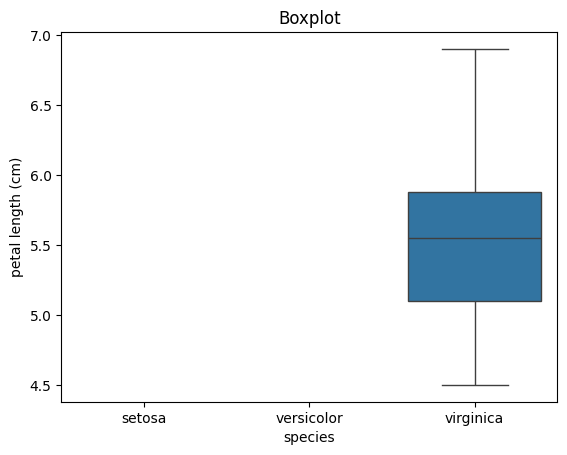

In [24]:
sns.boxplot(data=df_selected,x='species',y='petal length (cm)')
plt.title('Boxplot')
plt.show()


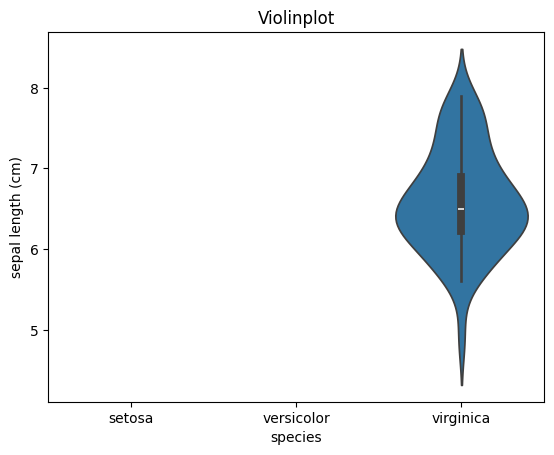

In [ ]:

sns.violinplot(data=df_selected,x='species',y='sepal length (cm)')
plt.title('Violinplot')
plt.show()

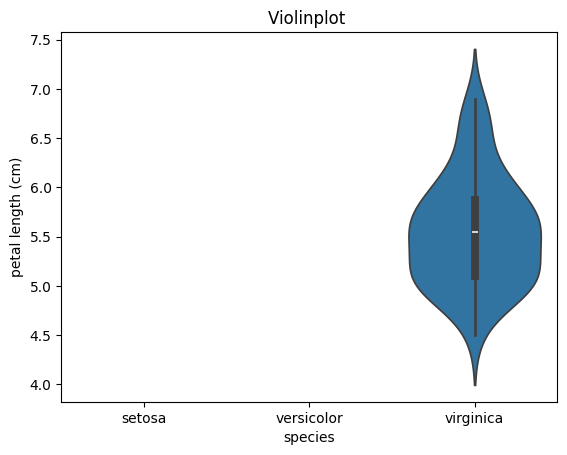

In [ ]:
sns.violinplot(data=df_selected,x='species',y='petal length (cm)')
plt.title('Violinplot ')
plt.show();

In [25]:
#[Problem 3] Division of preprocessing/training data and verification data
from sklearn.model_selection import train_test_split
features_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
df['target']=iris.target

x=df[features_names].values
y=df['target'].values

x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)


(112, 4)
(38, 4)
(112,)
(38,)


In [26]:
#[Problem 4] Pretreatment/Standardization
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_s=scale.fit_transform(x_train)
x_val_s=scale.fit_transform(x_valid)
print(x_train_s.shape)



(112, 4)


In [27]:
#[Problem 5] Learning and estimation
from sklearn.neighbors import KNeighborsClassifier
neigh1=KNeighborsClassifier(n_neighbors=1)
neigh2=KNeighborsClassifier(n_neighbors=3)
neigh3=KNeighborsClassifier(n_neighbors=5)

kn1=neigh1.fit(x_train,y_train)
kn2=neigh2.fit(x_train,y_train)
kn3=neigh3.fit(x_train,y_train)

print(kn1.predict(x_val_s))
print(kn2.predict(x_val_s))
print(kn3.predict(x_val_s))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [28]:
#[Problem 6] Evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score ,confusion_matrix
x_pre=kn1.predict(x_val_s)
print(f'Accuracy:{accuracy_score(y_valid,x_pre)}')
print(f'Precision:{precision_score(y_valid,x_pre ,average="macro")}')
print(f'Recall:',recall_score(y_valid,x_pre,average="macro"))
print(f'F1:{f1_score(y_valid,x_pre,average="macro")}')
print("Confusion matrix:\n", confusion_matrix(y_valid, x_pre))


Accuracy:0.34210526315789475
Precision:0.11403508771929825
Recall: 0.3333333333333333
F1:0.1699346405228758
Confusion matrix:
 [[13  0  0]
 [16  0  0]
 [ 9  0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Accuracy -
How many predictions were correct overall.
It checks if the model is right overall.
#Precision
How often the model is right when it says "yes".
#Recall
How well the model finds all the actual "yes" cases.
#F1
A balanced score between precision and recall.
#Confusion Matrix
The confusion matrix is a simple table that helps you see how well your model is performing




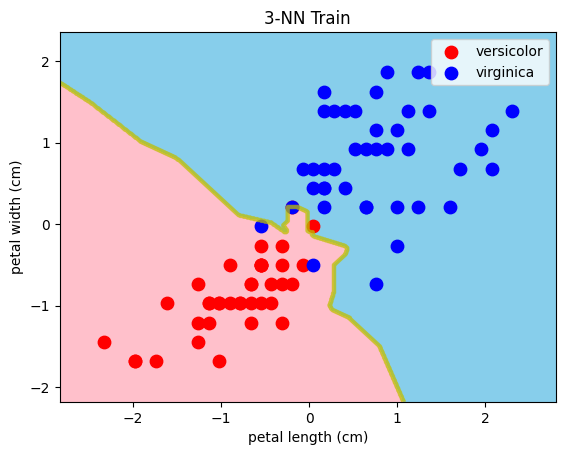

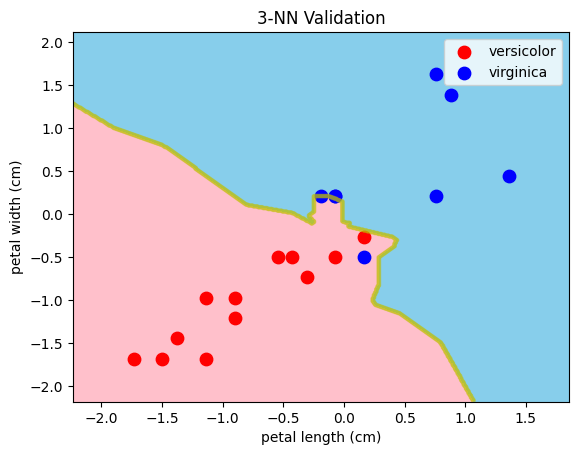

In [29]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Load iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Select 2 features and filter for binary classification (class 1 and 2)
features_2d = ['petal length (cm)', 'petal width (cm)']
x_2d = df[features_2d].values
y = df['target'].values

# Filter only class 1 and 2
binary_filter = (y == 1) | (y == 2)
x_2d_binary = x_2d[binary_filter]
y_binary = y[binary_filter]

x_train, x_valid, y_train, y_valid = train_test_split(x_2d_binary, y_binary, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_valid_s = scaler.transform(x_valid)

kn3 = KNeighborsClassifier(n_neighbors=3)
kn3.fit(x_train_s, y_train)

# Decision region function
def decision_region(
    X,
    y,
    model,
    step=0.01,
    title="decision region",
    xlabel="xlabel",
    ylabel="ylabel",
    target_names=["versicolor", "virginica"],
):
    scatter_color = ["red", "blue"]
    contourf_color = ["pink", "skyblue"]
    n_class = 2

    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step),
        np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step),
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(
        mesh_f0, mesh_f1, y_pred, n_class - 1, cmap=ListedColormap(contourf_color)
    )
    plt.contour(
        mesh_f0, mesh_f1, y_pred, n_class - 1, colors="y", linewidths=3, alpha=0.5
    )
    for i, target in enumerate(np.unique(y)):
        plt.scatter(
            X[y == target][:, 0],
            X[y == target][:, 1],
            s=80,
            color=scatter_color[i],
            label=target_names[i],
            marker="o",
        )
    patches = [
        mpatches.Patch(color=scatter_color[i], label=target_names[i])
        for i in range(n_class)
    ]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

# Show decision region
decision_region(x_train_s, y_train, kn3, title="3-NN Train", xlabel=features_2d[0], ylabel=features_2d[1])
decision_region(x_valid_s, y_valid, kn3, title="3-NN Validation", xlabel=features_2d[0], ylabel=features_2d[1])


K Nearest neighbor Accuracy:0.95
K Nearest neighbor Precision:0.9615384615384616
K Nearest neighbor Recall:0.9375
K Nearest neighbor F1:0.9466666666666667


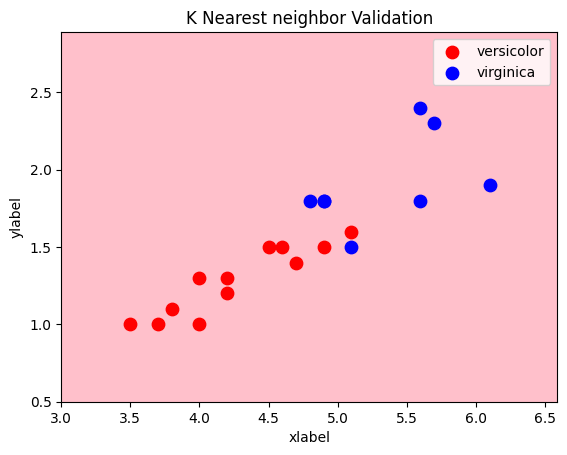

Logistic Regression Accuracy:0.9
Logistic Regression Precision:0.8958333333333333
Logistic Regression Recall:0.8958333333333333
Logistic Regression F1:0.8958333333333333


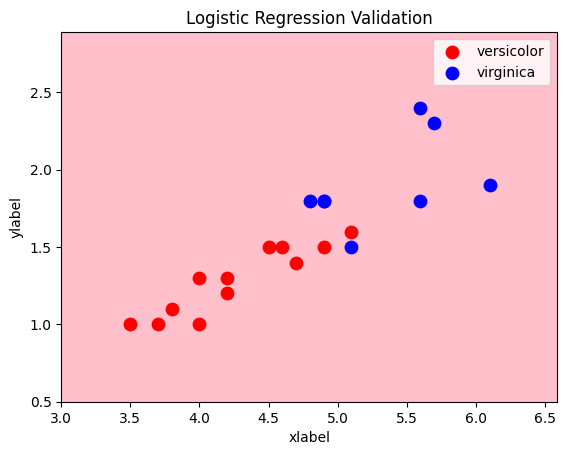

Support Vector Machine Accuracy:0.9
Support Vector Machine Precision:0.8958333333333333
Support Vector Machine Recall:0.8958333333333333
Support Vector Machine F1:0.8958333333333333


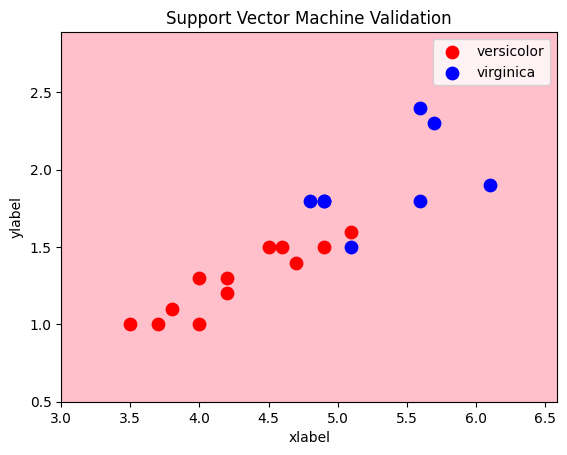

Decision Tree Accuracy:0.9
Decision Tree Precision:0.8958333333333333
Decision Tree Recall:0.8958333333333333
Decision Tree F1:0.8958333333333333


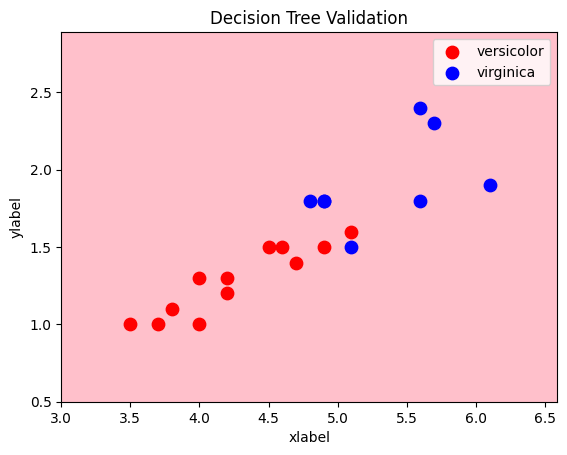

Random Forest Accuracy:0.95
Random Forest Precision:0.9444444444444444
Random Forest Recall:0.9583333333333333
Random Forest F1:0.948849104859335


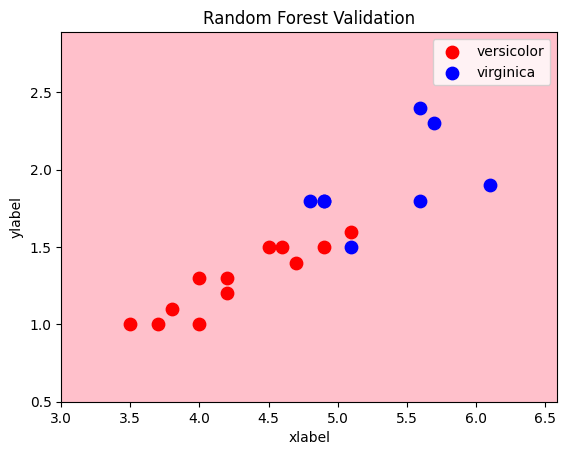

In [32]:
#[Problem 8] Learning by other methods
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model={
    'K Nearest neighbor':KNeighborsClassifier(),
    'Logistic Regression':LogisticRegression(),
    'Support Vector Machine':SVC(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier()
}
for name,model in model.items():
    model.fit(x_train_s,y_train)
    y_pred=model.predict(x_valid_s)
    print(f'{name} Accuracy:{accuracy_score(y_valid,y_pred)}')
    print(f'{name} Precision:{precision_score(y_valid,y_pred,average="macro")}')
    print(f'{name} Recall:{recall_score(y_valid,y_pred,average="macro")}')
    print(f'{name} F1:{f1_score(y_valid,y_pred,average="macro")}')
    decision_region(x_valid,y_valid,model, title=name + " Validation")

=== Results WITHOUT Standardization ===
K Nearest neighbor Accuracy: 0.76
K Nearest neighbor Precision: 0.77
K Nearest neighbor Recall: 0.78
K Nearest neighbor F1: 0.76


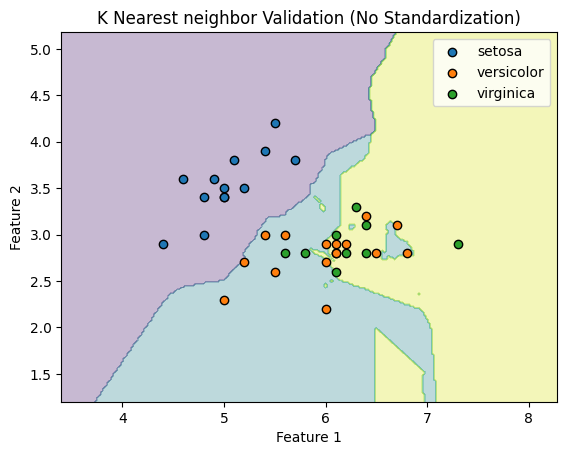

Logistic Regression Accuracy: 0.79
Logistic Regression Precision: 0.78
Logistic Regression Recall: 0.78
Logistic Regression F1: 0.78


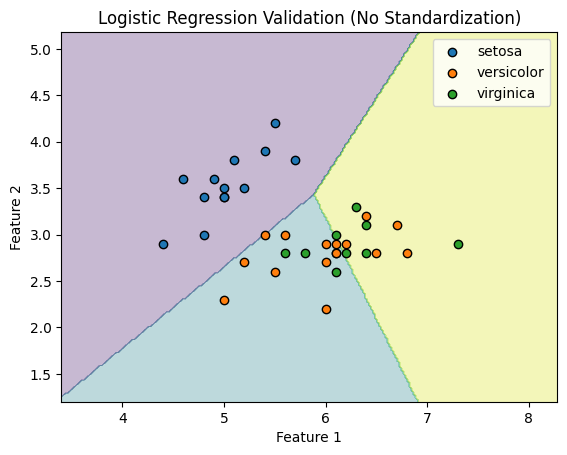

Support Vector Machine Accuracy: 0.76
Support Vector Machine Precision: 0.74
Support Vector Machine Recall: 0.75
Support Vector Machine F1: 0.75


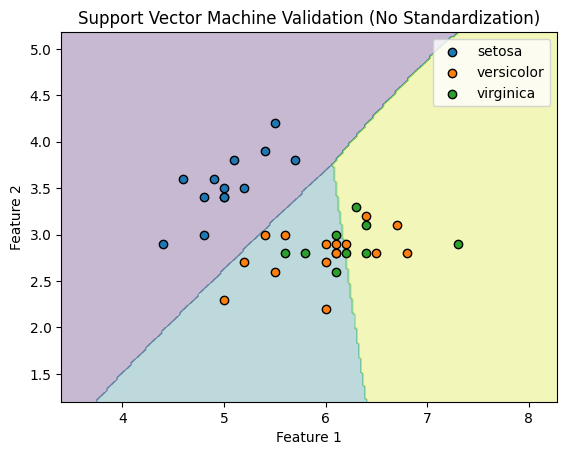

Decision Tree Accuracy: 0.66
Decision Tree Precision: 0.64
Decision Tree Recall: 0.65
Decision Tree F1: 0.64


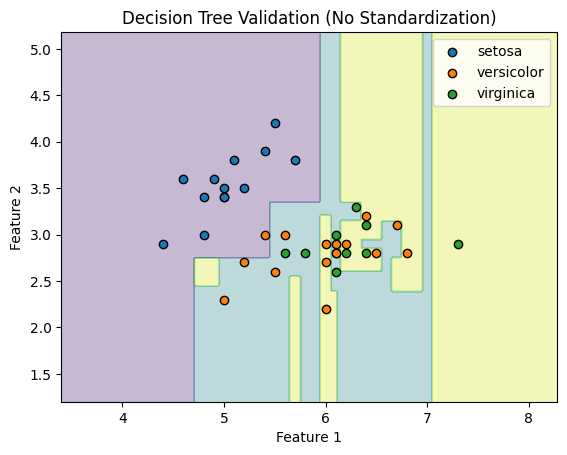

Random Forest Accuracy: 0.58
Random Forest Precision: 0.57
Random Forest Recall: 0.59
Random Forest F1: 0.57


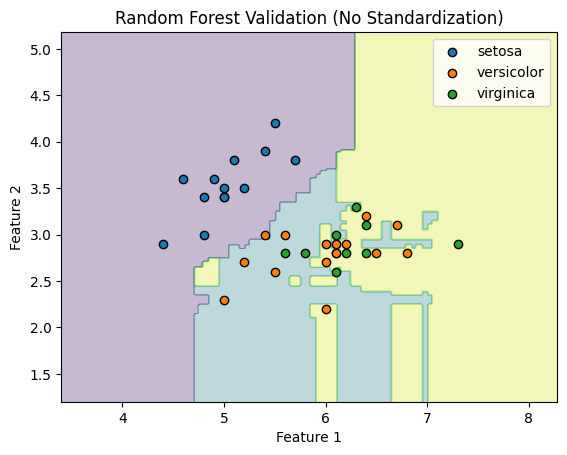

In [40]:
#[Problem 9] (Advanced task) Comparison with and without standardization

iris = load_iris()
x = iris.data[:, :2]  # Use only first 2 features for 2D plotting (sepal length, sepal width)
y = iris.target
target_names = iris.target_names

# Split data
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=0)


def decision_region(X, y, model, title="", xlabel="Feature 1", ylabel="Feature 2"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y == target, 0], X[y == target, 1], label=target_names[target], edgecolor='k')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

models = {
    'K Nearest neighbor': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

print("=== Results WITHOUT Standardization ===")
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_valid)

    print(f'{name} Accuracy: {accuracy_score(y_valid, y_pred):.2f}')
    print(f'{name} Precision: {precision_score(y_valid, y_pred, average="macro"):.2f}')
    print(f'{name} Recall: {recall_score(y_valid, y_pred, average="macro"):.2f}')
    print(f'{name} F1: {f1_score(y_valid, y_pred, average="macro"):.2f}')
    decision_region(x_valid, y_valid, model, title=name + " Validation (No Standardization)")


In [41]:
#[Problem 10] (Advance assignment) Highly accurate method using all objective variables
X_multi = df[iris.feature_names].values
y_multi = df['target'].values

# Train/test split
X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(
    X_multi, y_multi, test_size=0.25, random_state=42, stratify=y_multi
)

# Standardize for multi-class models
scaler_m = StandardScaler()
scaler_m.fit(X_train_m)
X_train_m_std = scaler_m.transform(X_train_m)
X_val_m_std = scaler_m.transform(X_val_m)

multi_models = {
    "k-NN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

print("---- Multi-class Classification Results ----")
multi_results = []
for name, model in multi_models.items():
    model.fit(X_train_m_std, y_train_m)
    y_pred_m = model.predict(X_val_m_std)
    acc = accuracy_score(y_val_m, y_pred_m)
    prec = precision_score(y_val_m, y_pred_m, average='macro')
    rec = recall_score(y_val_m, y_pred_m, average='macro')
    f1 = f1_score(y_val_m, y_pred_m, average='macro')
    cm = confusion_matrix(y_val_m, y_pred_m)
    print(f"{name}: Accuracy={acc:.3f}, Precision={prec:.3f}, Recall={rec:.3f}, F1={f1:.3f}")
    print(f"Confusion Matrix:\n{cm}\n")
    multi_results.append((name, acc, prec, rec, f1, cm))

# Summary table for multi-class (simple print)
import pandas as pd
summary = pd.DataFrame({
    'Model': [r[0] for r in multi_results],
    'Accuracy': [r[1] for r in multi_results],
    'Precision (macro)': [r[2] for r in multi_results],
    'Recall (macro)': [r[3] for r in multi_results],
    'F1 Score (macro)': [r[4] for r in multi_results],
})
print(summary)

---- Multi-class Classification Results ----
k-NN (k=5): Accuracy=0.921, Precision=0.938, Recall=0.923, F1=0.922
Confusion Matrix:
[[12  0  0]
 [ 0 13  0]
 [ 0  3 10]]

Logistic Regression: Accuracy=0.921, Precision=0.925, Recall=0.923, F1=0.923
Confusion Matrix:
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]

SVM: Accuracy=0.947, Precision=0.949, Recall=0.949, F1=0.949
Confusion Matrix:
[[12  0  0]
 [ 0 12  1]
 [ 0  1 12]]

Decision Tree: Accuracy=0.921, Precision=0.925, Recall=0.923, F1=0.923
Confusion Matrix:
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]

Random Forest: Accuracy=0.921, Precision=0.925, Recall=0.923, F1=0.923
Confusion Matrix:
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]

                 Model  Accuracy  Precision (macro)  Recall (macro)  \
0           k-NN (k=5)  0.921053           0.937500        0.923077   
1  Logistic Regression  0.921053           0.924603        0.923077   
2                  SVM  0.947368           0.948718        0.948718   
3        Decision Tree  0.921053           